# Cirrhosis Prediction

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import io
import numpy as np

## Retrieve the Data

In [55]:
# Import the data
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['cirrhosis.csv'].decode('utf-8')))
df.head()

Saving cirrhosis.csv to cirrhosis (1).csv


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [56]:
# Drop duplicate data
df = df.drop_duplicates()
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [58]:
# Check null value
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [59]:
# Drop meanless columns
df = df.drop(columns=['ID','Drug','Status'])

In [60]:
# Check data structure to decide how to fill null value
stage1_df = (df.loc[df['Stage']==1.0]).dropna()
stage2_df = (df.loc[df['Stage']==2.0]).dropna()
stage3_df = (df.loc[df['Stage']==3.0]).dropna()
stage4_df = (df.loc[df['Stage']==4.0]).dropna()

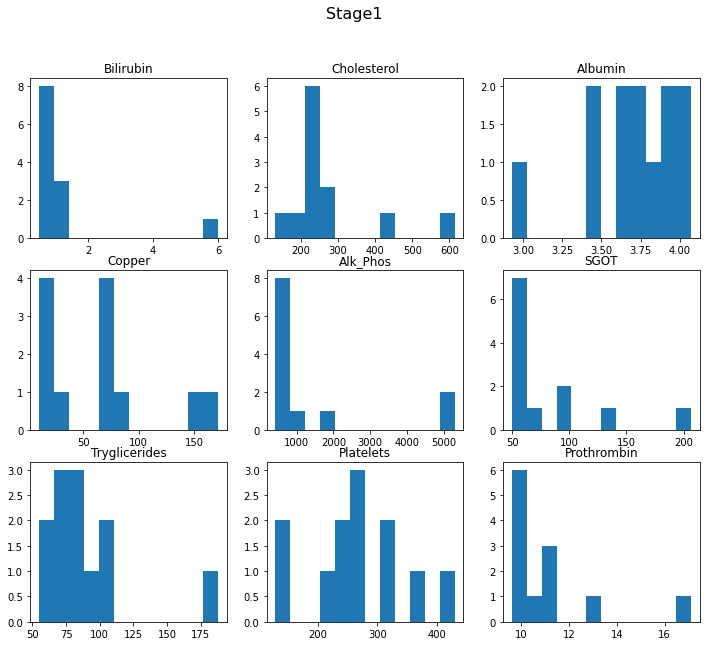

In [61]:
# Check data structure to decide how to fill null value by stage1
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Stage1', fontsize=16)
axs[0, 0].hist(stage1_df['Bilirubin'],stage1_df['Bilirubin'].count())
axs[0, 0].set_title('Bilirubin')
axs[0, 1].hist(stage1_df['Cholesterol'],stage1_df['Cholesterol'].count())
axs[0, 1].set_title('Cholesterol')
axs[0, 2].hist(stage1_df['Albumin'],stage1_df['Albumin'].count())
axs[0, 2].set_title('Albumin')
axs[1, 0].hist(stage1_df['Copper'],stage1_df['Copper'].count())
axs[1, 0].set_title('Copper')
axs[1, 1].hist(stage1_df['Alk_Phos'],stage1_df['Alk_Phos'].count())
axs[1, 1].set_title('Alk_Phos')
axs[1, 2].hist(stage1_df['SGOT'],stage1_df['SGOT'].count())
axs[1, 2].set_title('SGOT')
axs[2, 0].hist(stage1_df['Tryglicerides'],stage1_df['Tryglicerides'].count())
axs[2, 0].set_title('Tryglicerides')
axs[2, 1].hist(stage1_df['Platelets'],stage1_df['Platelets'].count())
axs[2, 1].set_title('Platelets')
axs[2, 2].hist(stage1_df['Prothrombin'],stage1_df['Prothrombin'].count())
axs[2, 2].set_title('Prothrombin');

In [62]:
# To fill up null value(numeric columns:by mean(normal distribution) or median(long tail distribution), non-numeric columns: by mode)\
s1 = df['Stage']==1.0
for col in ['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Prothrombin']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].median())
for col in ['Albumin','Platelets']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mean())
for col in ['Ascites','Hepatomegaly','Spiders','Edema']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mode().values[0])

In [63]:
# Check if fillna successfully
df.loc[df['Stage']==1.0].isnull().sum()

N_Days           0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

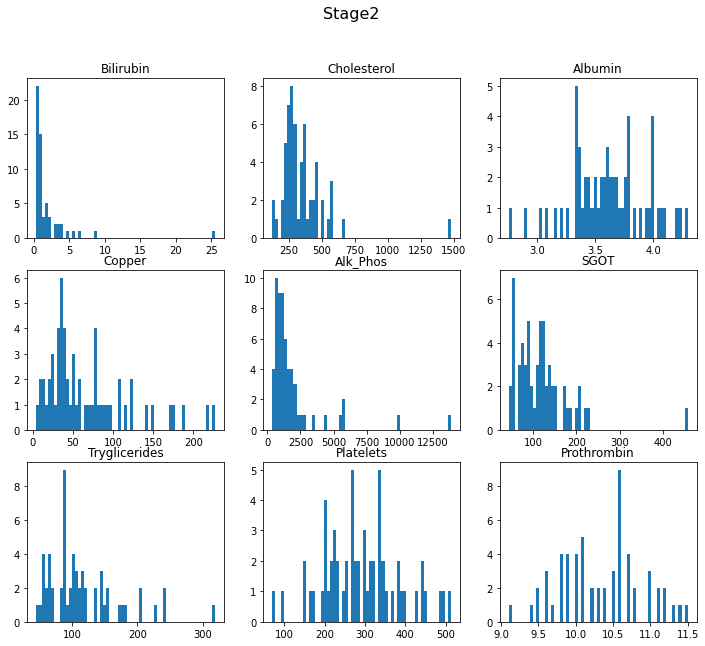

In [64]:
# Check data structure to decide how to fill null value by stage2
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Stage2', fontsize=16)
axs[0, 0].hist(stage2_df['Bilirubin'],stage2_df['Bilirubin'].count())
axs[0, 0].set_title('Bilirubin')
axs[0, 1].hist(stage2_df['Cholesterol'],stage2_df['Cholesterol'].count())
axs[0, 1].set_title('Cholesterol')
axs[0, 2].hist(stage2_df['Albumin'],stage2_df['Albumin'].count())
axs[0, 2].set_title('Albumin')
axs[1, 0].hist(stage2_df['Copper'],stage2_df['Copper'].count())
axs[1, 0].set_title('Copper')
axs[1, 1].hist(stage2_df['Alk_Phos'],stage2_df['Alk_Phos'].count())
axs[1, 1].set_title('Alk_Phos')
axs[1, 2].hist(stage2_df['SGOT'],stage2_df['SGOT'].count())
axs[1, 2].set_title('SGOT')
axs[2, 0].hist(stage2_df['Tryglicerides'],stage2_df['Tryglicerides'].count())
axs[2, 0].set_title('Tryglicerides')
axs[2, 1].hist(stage2_df['Platelets'],stage2_df['Platelets'].count())
axs[2, 1].set_title('Platelets')
axs[2, 2].hist(stage2_df['Prothrombin'],stage2_df['Prothrombin'].count())
axs[2, 2].set_title('Prothrombin');

In [65]:
# To fill up null value(numeric columns:by mean(normal distribution) or median(long tail distribution), non-numeric columns: by mode)\
s1 = df['Stage']==2.0
for col in ['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].median())
for col in ['Albumin','Platelets','Prothrombin']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mean())
for col in ['Ascites','Hepatomegaly','Spiders','Edema']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mode().values[0])

In [66]:
# Check if fillna successfully
df.loc[df['Stage']==2.0].isnull().sum()

N_Days           0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

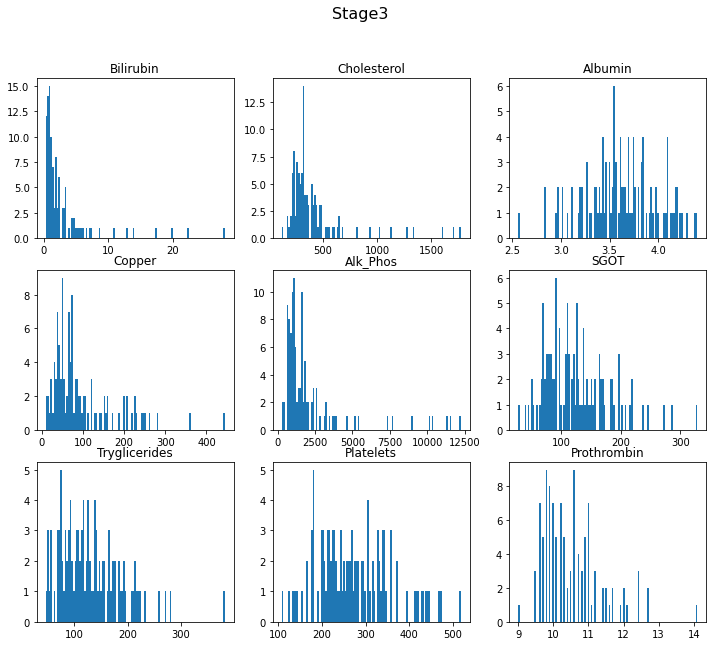

In [67]:
# Check data structure to decide how to fill null value by stage3
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Stage3', fontsize=16)
axs[0, 0].hist(stage3_df['Bilirubin'],stage3_df['Bilirubin'].count())
axs[0, 0].set_title('Bilirubin')
axs[0, 1].hist(stage3_df['Cholesterol'],stage3_df['Cholesterol'].count())
axs[0, 1].set_title('Cholesterol')
axs[0, 2].hist(stage3_df['Albumin'],stage3_df['Albumin'].count())
axs[0, 2].set_title('Albumin')
axs[1, 0].hist(stage3_df['Copper'],stage3_df['Copper'].count())
axs[1, 0].set_title('Copper')
axs[1, 1].hist(stage3_df['Alk_Phos'],stage3_df['Alk_Phos'].count())
axs[1, 1].set_title('Alk_Phos')
axs[1, 2].hist(stage3_df['SGOT'],stage3_df['SGOT'].count())
axs[1, 2].set_title('SGOT')
axs[2, 0].hist(stage3_df['Tryglicerides'],stage3_df['Tryglicerides'].count())
axs[2, 0].set_title('Tryglicerides')
axs[2, 1].hist(stage3_df['Platelets'],stage3_df['Platelets'].count())
axs[2, 1].set_title('Platelets')
axs[2, 2].hist(stage3_df['Prothrombin'],stage3_df['Prothrombin'].count())
axs[2, 2].set_title('Prothrombin');

In [68]:
# To fill up null value(numeric columns:by mean(normal distribution) or median(long tail distribution), non-numeric columns: by mode)\
s1 = df['Stage']==3.0
for col in ['Bilirubin','Cholesterol','Copper','Alk_Phos','Tryglicerides']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].median())
for col in ['Albumin','Platelets','Prothrombin','SGOT']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mean())
for col in ['Ascites','Hepatomegaly','Spiders','Edema']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mode().values[0])

In [69]:
# Check if fillna successfully
df.loc[df['Stage']==3.0].isnull().sum()

N_Days           0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

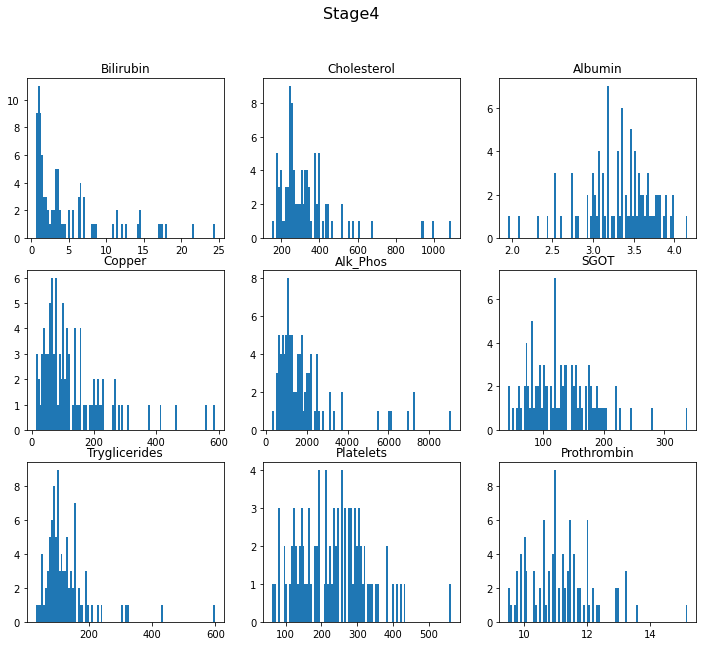

In [70]:
# Check data structure to decide how to fill null value by stage4
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Stage4', fontsize=16)
axs[0, 0].hist(stage4_df['Bilirubin'],stage4_df['Bilirubin'].count())
axs[0, 0].set_title('Bilirubin')
axs[0, 1].hist(stage4_df['Cholesterol'],stage4_df['Cholesterol'].count())
axs[0, 1].set_title('Cholesterol')
axs[0, 2].hist(stage4_df['Albumin'],stage4_df['Albumin'].count())
axs[0, 2].set_title('Albumin')
axs[1, 0].hist(stage4_df['Copper'],stage4_df['Copper'].count())
axs[1, 0].set_title('Copper')
axs[1, 1].hist(stage4_df['Alk_Phos'],stage4_df['Alk_Phos'].count())
axs[1, 1].set_title('Alk_Phos')
axs[1, 2].hist(stage4_df['SGOT'],stage4_df['SGOT'].count())
axs[1, 2].set_title('SGOT')
axs[2, 0].hist(stage4_df['Tryglicerides'],stage4_df['Tryglicerides'].count())
axs[2, 0].set_title('Tryglicerides')
axs[2, 1].hist(stage4_df['Platelets'],stage4_df['Platelets'].count())
axs[2, 1].set_title('Platelets')
axs[2, 2].hist(stage4_df['Prothrombin'],stage4_df['Prothrombin'].count())
axs[2, 2].set_title('Prothrombin');

In [71]:
# To fill up null value(numeric columns:by mean(normal distribution) or median(long tail distribution), non-numeric columns: by mode)\
s1 = df['Stage']==4.0
for col in ['Bilirubin','Cholesterol','Copper','Alk_Phos','Tryglicerides','SGOT']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].median())
for col in ['Albumin','Platelets','Prothrombin']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mean())
for col in ['Ascites','Hepatomegaly','Spiders','Edema']:
  df.loc[s1,col] = df.loc[s1,col].fillna(df.loc[s1,col].mode().values[0])

In [72]:
# Check if fillna successfully
df.loc[df['Stage']==4.0].isnull().sum()

N_Days           0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [73]:
df.isnull().sum()

N_Days           0
Age              0
Sex              0
Ascites          6
Hepatomegaly     6
Spiders          6
Edema            0
Bilirubin        0
Cholesterol      6
Albumin          0
Copper           6
Alk_Phos         6
SGOT             6
Tryglicerides    6
Platelets        0
Prothrombin      0
Stage            6
dtype: int64

In [74]:
df = df.dropna()

In [75]:
# Transfrom Age from days to years
df['Age'] = (df['Age']/365).round()
df['Age']

<ipython-input-75-bd265b255853>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (df['Age']/365).round()


0      59.0
1      56.0
2      70.0
3      55.0
4      38.0
       ... 
413    67.0
414    39.0
415    57.0
416    58.0
417    53.0
Name: Age, Length: 412, dtype: float64

Visualize the data

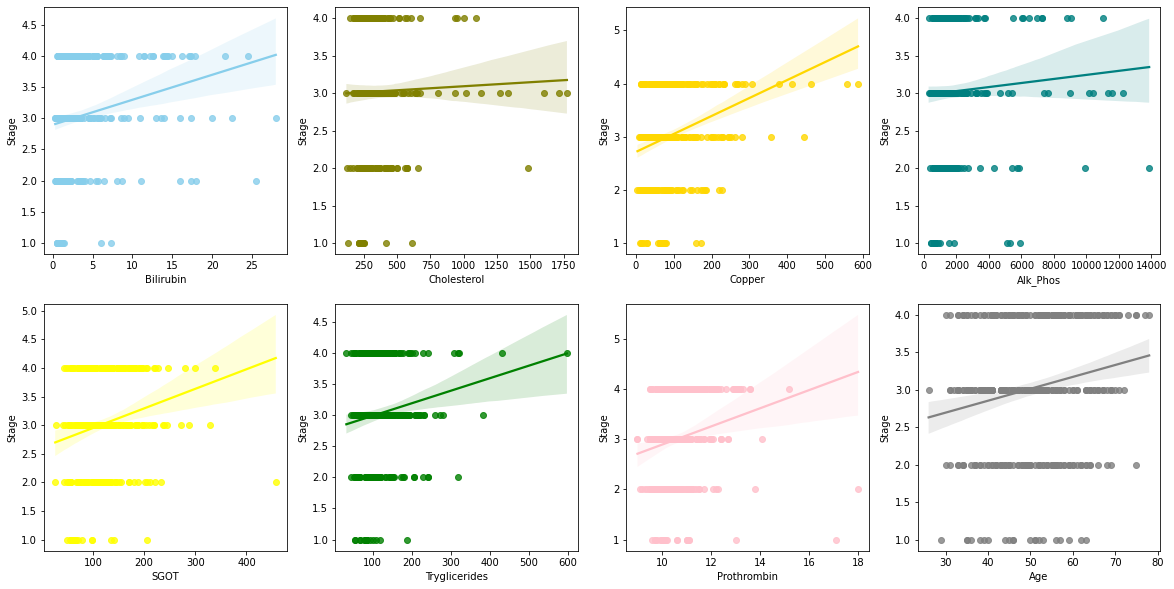

In [76]:
fig, axs = plt.subplots(2,4, figsize=(20, 10))
sns.regplot(x=df['Bilirubin'], y=df['Stage'],scatter=True, color="skyblue", ax=axs[0,0])
sns.regplot(x=df['Cholesterol'], y=df['Stage'],scatter=True, color="olive", ax=axs[0,1])
sns.regplot(x=df['Copper'], y=df['Stage'],scatter=True, color="gold", ax=axs[0,2])
sns.regplot(x=df['Alk_Phos'], y=df['Stage'],scatter=True,color="teal", ax=axs[0,3])
sns.regplot(x=df['SGOT'], y=df['Stage'],scatter=True, color="yellow", ax=axs[1,0])
sns.regplot(x=df['Tryglicerides'], y=df['Stage'],scatter=True,color="green", ax=axs[1,1])
sns.regplot(x=df['Prothrombin'], y=df['Stage'],scatter=True, color="pink", ax=axs[1,2])
sns.regplot(x=df['Age'], y=df['Stage'],scatter=True,color="grey", ax=axs[1,3]);

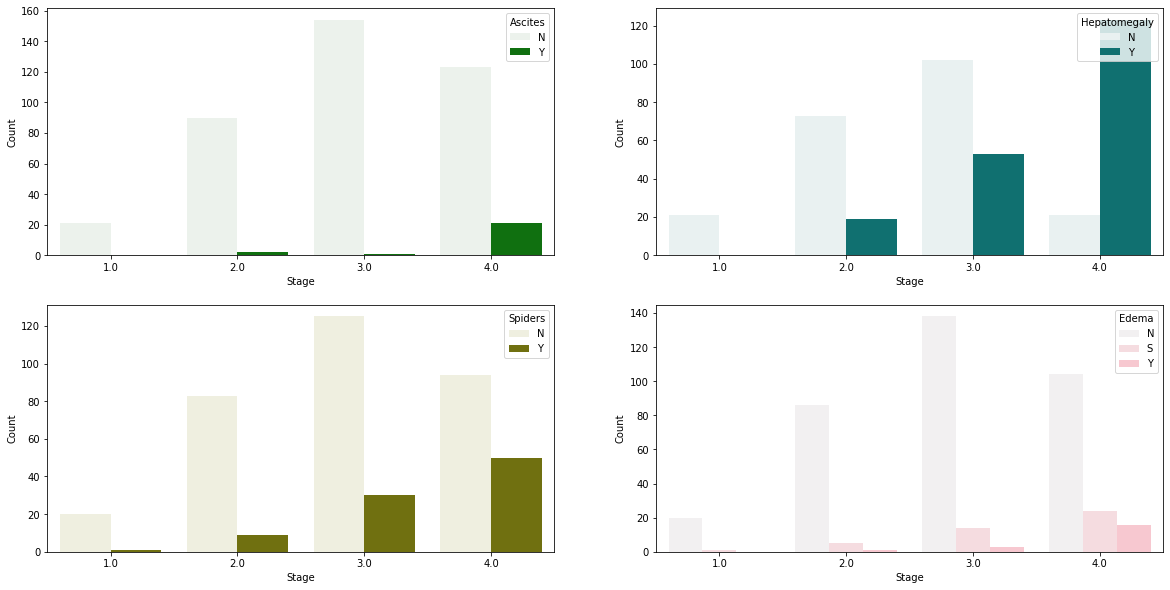

In [77]:

fig, axs = plt.subplots(2,2, figsize=(20, 10))
# Ascites
Ascites_df = df.groupby('Stage')['Ascites'].value_counts().reset_index(name='Count')
sns.barplot(data=Ascites_df, x='Stage', y='Count',hue='Ascites',color="green",ax=axs[0,0])

# Hepatomegaly
Hepatomegaly_df = df.groupby('Stage')['Hepatomegaly'].value_counts().reset_index(name='Count')
sns.barplot(data=Hepatomegaly_df, x='Stage', y='Count',hue='Hepatomegaly',color="teal",ax=axs[0,1])

# Spiders
Spiders_df = df.groupby('Stage')['Spiders'].value_counts().reset_index(name='Count')
sns.barplot(data=Spiders_df, x='Stage', y='Count',hue='Spiders',color="olive",ax=axs[1,0])

# Edema
Edema_df = df.groupby('Stage')['Edema'].value_counts().reset_index(name='Count')
sns.barplot(data=Edema_df, x='Stage', y='Count',hue='Edema',color="pink",ax=axs[1,1]);



## Create Models

## Split the Data into Training and Testing Sets

In [78]:
# Based on original reaserch, Stage 4.0 is Cirrhosis stage
df['Stage'] = df['Stage'].replace({1.0:0,2.0:0,3.0:0,4.0:1}).astype(int)

In [80]:
y = df['Stage']
y.value_counts()

0    268
1    144
Name: Stage, dtype: int64

In [81]:
X = df.drop(columns=['Stage','Cholesterol','Alk_Phos','SGOT','Tryglicerides','Sex','N_Days'],axis=1)
X

,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Platelets,Prothrombin
0,59.0,Y,Y,Y,Y,14.5,2.60,156.0,190.0,12.2
1,56.0,N,Y,Y,N,1.1,4.14,54.0,221.0,10.6
2,70.0,N,N,N,S,1.4,3.48,210.0,151.0,12.0
3,55.0,N,Y,Y,S,1.8,2.54,64.0,183.0,10.3
4,38.0,N,Y,Y,N,3.4,3.53,143.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...
413,67.0,N,N,N,N,1.2,2.96,67.5,174.0,10.9
414,39.0,N,Y,N,N,0.9,3.83,98.5,180.0,11.2
415,57.0,N,N,N,N,1.6,3.42,67.5,143.0,9.9
416,58.0,N,N,N,N,0.8,3.75,67.5,269.0,10.4


In [82]:
dummied_X = pd.get_dummies(X)
dummied_X

,Age,Bilirubin,Albumin,Copper,Platelets,Prothrombin,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,59.0,14.5,2.60,156.0,190.0,12.2,0,1,0,1,0,1,0,0,1
1,56.0,1.1,4.14,54.0,221.0,10.6,1,0,0,1,0,1,1,0,0
2,70.0,1.4,3.48,210.0,151.0,12.0,1,0,1,0,1,0,0,1,0
3,55.0,1.8,2.54,64.0,183.0,10.3,1,0,0,1,0,1,0,1,0
4,38.0,3.4,3.53,143.0,136.0,10.9,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,67.0,1.2,2.96,67.5,174.0,10.9,1,0,1,0,1,0,1,0,0
414,39.0,0.9,3.83,98.5,180.0,11.2,1,0,0,1,1,0,1,0,0
415,57.0,1.6,3.42,67.5,143.0,9.9,1,0,1,0,1,0,1,0,0
416,58.0,0.8,3.75,67.5,269.0,10.4,1,0,1,0,1,0,1,0,0


## Create, Fit and Compare Models


In [83]:
X_train, X_test, y_train, y_test = train_test_split(dummied_X, y,stratify = y, test_size=0.3,random_state=50)

### <span style='font-family:Helvetica;color:darkorange'> Classifier Models

In [85]:
Scaler = [StandardScaler(),MinMaxScaler(),RobustScaler()]
models= [SVC(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(max_iter=1000),AdaBoostClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(n_estimators = 100, max_depth =1)]
scores = []
for i in range(0,len(Scaler)):
  a = Scaler[i].fit(X_train)
  X_train_scaled = a.transform(X_train)
  X_test_scaled = a.transform(X_test)
  for u in range(0,len(models)):
    model = models[u]
    model.fit(X_train_scaled, y_train) 
    accuracy = model.score(X_test_scaled, y_test)
    y_true = y_test
    y_pred = model.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    recall = tp / (tp+fn) 
    precision = tp/(tp+fp)
    F1 = 2*(recall*precision)/(recall+precision)
    term={'Scaler':Scaler[i],'Model':models[u],'Accuracy':accuracy,'Recall':recall,'Precision':precision,'F1':F1}
    scores.append(term)


In [86]:
clfTestResult_df = pd.DataFrame(scores)
clfTestResult_df = clfTestResult_df.sort_values('Accuracy',ascending=False)
clfTestResult_df

,Scaler,Model,Accuracy,Recall,Precision,F1
20,RobustScaler(),([DecisionTreeRegressor(criterion='friedman_ms...,0.870968,0.813953,0.813953,0.813953
13,MinMaxScaler(),([DecisionTreeRegressor(criterion='friedman_ms...,0.870968,0.813953,0.813953,0.813953
6,StandardScaler(),([DecisionTreeRegressor(criterion='friedman_ms...,0.870968,0.813953,0.813953,0.813953
2,StandardScaler(),"(DecisionTreeClassifier(max_features='auto', r...",0.822581,0.720930,0.756098,0.738095
16,RobustScaler(),"(DecisionTreeClassifier(max_features='auto', r...",0.822581,0.744186,0.744186,0.744186
9,MinMaxScaler(),"(DecisionTreeClassifier(max_features='auto', r...",0.806452,0.720930,0.720930,0.720930
3,StandardScaler(),LogisticRegression(max_iter=1000),0.790323,0.767442,0.673469,0.717391
4,StandardScaler(),"(DecisionTreeClassifier(max_depth=1, random_st...",0.790323,0.697674,0.697674,0.697674
18,RobustScaler(),"(DecisionTreeClassifier(max_depth=1, random_st...",0.790323,0.697674,0.697674,0.697674
17,RobustScaler(),LogisticRegression(max_iter=1000),0.790323,0.767442,0.673469,0.717391


In [91]:
clfTestResult_df.to_csv('clfTestResult.csv')
files.download('clfTestResult.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <span style='font-family:Helvetica;color:darkorange'> Neural Network Models

In [92]:
# Create a good model

testsets=[]
for m in ['relu','elu','tanh','LeakyReLU']:
  for i in [64,32]:
    for j in [16,8,4]:
      nn_test = tf.keras.models.Sequential()
      # Input layer
      nn_test.add(tf.keras.layers.Dense(units = i, activation = m, input_dim = 15))
      # First hidden layer
      nn_test.add(tf.keras.layers.Dense(units = j, activation = m))
      # Output layer
      nn_test.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

      # Compile the model
      nn_test.compile(loss = 'binary_crossentropy', optimizer = 'Adam',metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
    
      for u in [10,20,30,40]:
        nn_test.fit(X_train_scaled,y_train,epochs =u)
        model_loss, model_accuracy, recall,precision= nn_test.evaluate(X_test_scaled,y_test,verbose=2)
        F1 = 2*(recall*precision)/(recall+precision)
        testset = {'activation':m, 'match':[i,j,u],'Loss':model_loss,'Accuracy':model_accuracy,'Recall':recall,'Precision':precision,'F1':F1}
        testsets.append(testset)


Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.6736 - accuracy: 0.6458 - recall_36: 0.4554 - precision_36: 0.4946
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7569 - recall_36: 0.6139 - precision_36: 0.6667
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7604 - recall_36: 0.5842 - precision_36: 0.6860
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7708 - recall_36: 0.5842 - precision_36: 0.7108
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7847 - recall_36: 0.6139 - precision_36: 0.7294
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7882 - recall_36: 0.6139 - precision_36: 0.7381
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 0.7917 - recall_36: 0.6040 - precision_36: 0.7531
Epoch 8/10
9/9 [===========

In [93]:
NNResult_df = pd.DataFrame(testsets)
NNResult_df = NNResult_df.sort_values('Accuracy',ascending=False)
NNResult_df


,activation,match,Loss,Accuracy,Recall,Precision,F1
79,LeakyReLU,"[64, 8, 40]",0.445607,0.854839,0.767442,0.804878,0.785714
2,relu,"[64, 16, 30]",0.471842,0.854839,0.744186,0.820513,0.780488
13,relu,"[32, 16, 20]",0.422710,0.846774,0.767442,0.785714,0.776471
51,tanh,"[64, 16, 40]",0.423855,0.846774,0.813953,0.760870,0.786517
77,LeakyReLU,"[64, 8, 20]",0.414322,0.838710,0.744186,0.780488,0.761905
...,...,...,...,...,...,...,...
84,LeakyReLU,"[32, 16, 10]",0.553315,0.733871,0.581395,0.625000,0.602410
48,tanh,"[64, 16, 10]",0.480124,0.733871,0.697674,0.600000,0.645161
68,tanh,"[32, 4, 10]",0.523262,0.725806,0.697674,0.588235,0.638298
64,tanh,"[32, 8, 10]",0.526373,0.709677,0.720930,0.563636,0.632653


In [94]:
NNResult_df.to_csv('NNResult.csv') 
files.download('NNResult.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <span style='font-family:Helvetica;color:darkorange'> Final Model

In [123]:
Scaler = StandardScaler().fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)
predmodel=GradientBoostingClassifier(n_estimators = 100, max_depth =1)
model = predmodel.fit(X_train_scaled, y_train) 

In [121]:
import pickle

pickle.dump(Scaler, open('scaler.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

# save model
files.download('scaler.pkl')
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>